In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

# 

<a name='section100'></a>
# Présentation du projet : 


### Pour implanter notre entreprise partout dans le monde, il est nécessaire d'observer et determiner :

    * Quels sont les pays avec un fort potentiel de clients pour nos services ?
    * Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
    * Dans quels pays l'entreprise doit-elle opérer en priorité ?

#  Sommaire
<a name='section0'></a>

## [Objectif du projet ](#section100)

### 1.[Country](#section1)
 *  1.1  [Répartition des pays par région selon leur développement](#section11)

### 2.[Data](#section2)

### 3.[Indicateurs](#section3)

   *  3.1  [corrélation des indicateurs](#section31)

### 4.[Pays  sélectionnés par chaque région  ey par chaque groupe de développemen](#section4)
   *  4.1  [Pays par regions](#section41)       
   *  4.2  [Pays par leurs niveaux de développement ](#section42)
   *  4.3  [pays selon nos indicateurs](#section43)
       
### 6.[Pays sélectionnés](#section5)
        
### 7.[Évaluation de ce potentiel](#section7)
       
   *  7.1  [Fort potentiel de clients](#section71)
       
### 8.[Entreprise en priorité ](#section8)
         
   *  8.1  [Quelques observations](#section81)
        

       
       


# 



<a name='section1'></a>
### Dataset Country
[retour au sommaire](#section0)

In [2]:
df_country = pd.read_csv('EdStatsCountry.csv')     #chargement du Dataset "Country"


In [4]:
# df_country_2 = pd.read_html('https://datacatalog.worldbank.org/dataset/education-statistics')

In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [4]:
df_country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


Découvrons  le taux des valeurs manquantes

In [5]:
valeurs_manq =(df_country.isna().sum()/df_country.shape[0]).sort_values(ascending=True)


<AxesSubplot:>

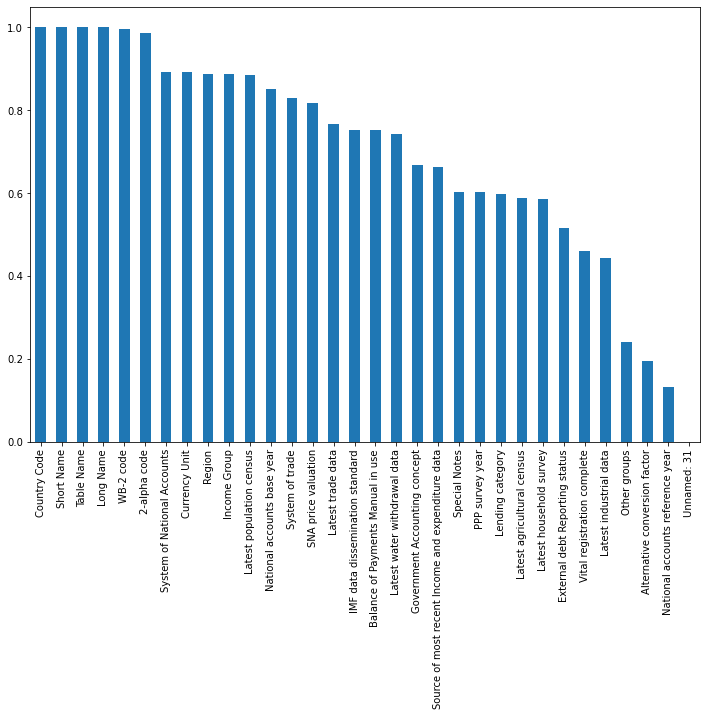

In [6]:
plt.figure(figsize=(12,8))                                          #valeurs manquantes - representation graphique                                           
country_fill_rate =1- valeurs_manq 
country_fill_rate.plot(kind ='bar')

Pour une analyse plus approfondie, nous ne laisserons que 3 colonnes de ce Dataset, car les colonnes restantes ne contiennent pas d'informations utiles en matière de choix des pays

In [7]:
col_utile=['Country Code', 'Region', 'Income Group']
df_country = df_country[col_utile]

In [8]:
df_country.dropna(inplace=True) # suppression les valeurs vides, et affichage du Dataset
df_country.describe(include='all')

,Country Code,Region,Income Group
count,214,214,214
unique,214,7,5
top,ABW,Europe & Central Asia,Upper middle income
freq,1,57,55






<a name='section11'></a>
#### Répartition des pays par région selon leur développement
*  [retour au sommaire](#section0) 

<AxesSubplot:xlabel='Region', ylabel='count'>

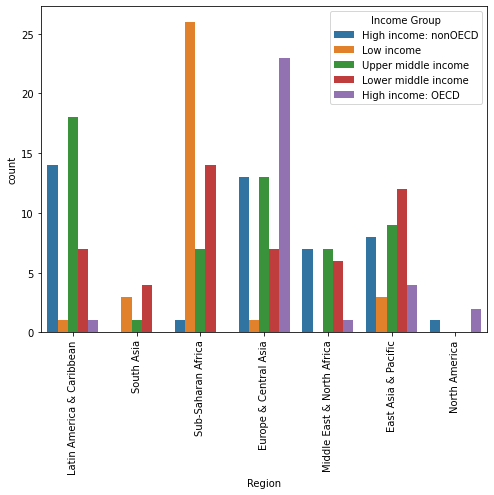

In [9]:
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)
sns.countplot(x='Region',hue='Income Group', data = df_country)
# plt.savefig('country_reg_income.png')

# 


<a name='section2'></a>
### Dataset Data
*  [retour au sommaire](#section0) 

In [10]:
df_data = pd.read_csv('EdStatsData.csv')       #chargement du Dataset "Data"
df_data_copy=df_data.copy()

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [12]:
df_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On va remplacer toutes les colonnes numériques existantes par 2 nouvelles colonnes, basées sur le premier et dernier jour de l'enregistrement

In [13]:
data_annee = df_data.loc[:,'1970':'2020']    # sélectionnons les colonnes numériques

In [14]:
valeurs_historique = data_annee.bfill(axis=1)['1970']     #le premier jour d'enregistrement 
valuers_actuelle = data_annee.ffill(axis=1)['2020']       #le dernier jour d'enregistrement 

In [15]:
df_data = df_data.iloc[:,0:4]     #suppression les colonnes numériques existantes

In [16]:
df_data.insert(loc=len(df_data.columns),column='Donnees_historique',value=valeurs_historique.values ) #insertion
df_data.insert(loc=len(df_data.columns),column='Donnees_actuelle',value=valuers_actuelle.values ) #insertion

Après avoir supprimé np.NaN, nous avons obtenu le jeu de données avec 357405 lignes

In [17]:
print(df_data.shape)
df_data.dropna(inplace=True)

(886930, 6)


In [18]:
df_data.describe(include='all') # on a toujours 242 pays et 3665 indicateurs différents 

,Country Name,Country Code,Indicator Name,Indicator Code,Donnees_historique,Donnees_actuelle
count,357405,357405,357405,357405,3.574050e+05,3.574050e+05
unique,242,242,3665,3665,NaN,NaN
top,Colombia,COL,Population growth (annual %),SP.POP.GROW,NaN,NaN
freq,2462,2462,240,240,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.241944e+09,1.007026e+10
std,NaN,NaN,NaN,NaN,1.742935e+11,6.440886e+11
min,NaN,NaN,NaN,NaN,-3.708940e+05,-6.157480e+05
25%,NaN,NaN,NaN,NaN,1.600000e+00,2.250000e+00
50%,NaN,NaN,NaN,NaN,2.298377e+01,2.543093e+01
75%,NaN,NaN,NaN,NaN,3.162257e+02,3.900000e+02


# 

<a name='section3'></a>
### Indicateurs
*  [retour au sommaire](#section0)

In [19]:
# ce sont des indicateurs qui caractérisent le plus les pays, à mon avis 

indicator= {'IT.NET.USER.P2','SE.SEC.NENR','UIS.EA.MEAN.1T6.AG25T99','SE.ADT.LITR.ZS',\
            'SL.TLF.BASC.FE.ZS','SE.ADT.1524.LT.ZS','UIS.XUNIT.PPP.3.FSGOV',\
            'SE.PRM.ENRL.TC.ZS','SP.POP.1564.TO.ZS','UIS.TEP.6.F','UIS.PTRHC.3'}

df_data=df_data[df_data['Indicator Code'].isin(indicator)] # suppression les indicateurs non sélectionnés

In [20]:
# transformation les noms des indicateurs sous une forme plus compréhensible

indicator_transform={'IT.NET.USER.P2':'Internet(1/100)','SE.SEC.NENR':'Taux net secondaire',\
                     'UIS.EA.MEAN.1T6.AG25T99':'Scolarisation de 25+',\
                       'SE.ADT.LITR.ZS':'Taux alphabét 15+','SL.TLF.BASC.FE.ZS':'Education de base femme',\
                     'SE.ADT.1524.LT.ZS':'Niveau education 15-24',\
                       'SE.PRM.ENRL.TC.ZS':'Elèves/enseignants',\
                       'SP.POP.1564.TO.ZS':'population entre 15-64',\
                      'UIS.TEP.6.F':'enseignement supérieur','UIS.XUNIT.PPP.3.FSGOV':'implication de lÉtat',\
                      'UIS.PTRHC.3':'élèves/enseignants sup'} 

df_data['Indicator Code'] = df_data.loc[:,'Indicator Code'].map(indicator_transform) 

In [21]:
df_data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,Donnees_historique,Donnees_actuelle
count,1922,1922,1922,1922,1922.000000,1922.000000
unique,240,240,11,11,NaN,NaN
top,Chile,CHL,Internet users (per 100 people),Internet(1/100),NaN,NaN
freq,11,11,233,233,NaN,NaN
mean,NaN,NaN,NaN,NaN,240.554621,343.318399
std,NaN,NaN,NaN,NaN,1154.497602,1624.743080
min,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,14.007235,19.734955
50%,NaN,NaN,NaN,NaN,45.494947,58.298460
75%,NaN,NaN,NaN,NaN,74.454440,85.635347


Le pourcentage d'importance de chaque indicateur et leurs corrélations

In [22]:
pii = df_data.pivot_table(index='Country Code', columns='Indicator Code', values='Donnees_actuelle')

In [23]:
pii.count(axis=0)/pii.shape[0]

Indicator Code
Education de base femme    0.404167
Elèves/enseignants         0.941667
Internet(1/100)            0.970833
Niveau education 15-24     0.766667
Scolarisation de 25+       0.608333
Taux alphabét 15+          0.775000
Taux net secondaire        0.787500
enseignement supérieur     0.487500
implication de lÉtat       0.533333
population entre 15-64     0.912500
élèves/enseignants sup     0.820833
dtype: float64


Après avoir choisi  les 11 indicateurs (à mon avis, ce sont des indicateurs qui caractérisent le plus les pays) sur 357405
* nous constatons qu'il y a une énorme pénurie d'enseignants dans le monde,
* problèmes avec le niveau d'éducation des femmes et 
* avec le niveau de l'enseignement supérieur en général


<AxesSubplot:xlabel='Indicator Code', ylabel='Indicator Code'>

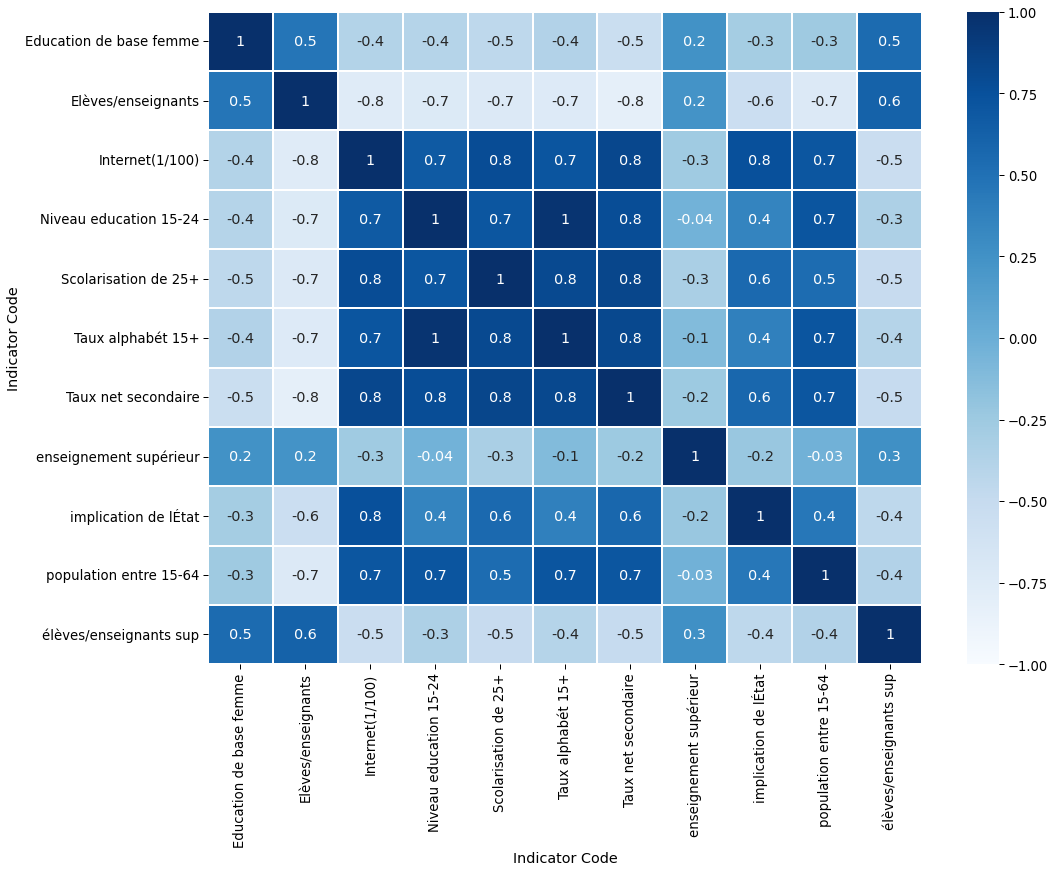

In [24]:
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.5 )
sns.heatmap(pii.corr(), annot=True,   vmin=-1,
    vmax=1,cmap='Blues',center=0,fmt='.1g' ,cbar=True,linewidths=0.2,
    linecolor='white')
# plt.savefig('tabl_corr_avant.png')


Suppression des pays où le nombre de citoyens âgés de 15 à 64 ans est inférieur à 50% du nombre total


<AxesSubplot:xlabel='Donnees_actuelle'>

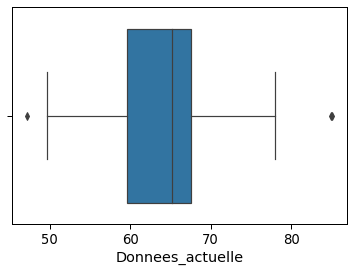

In [25]:
ind_popul = df_data[df_data['Indicator Code'] == 'population entre 15-64']
sns.boxplot(ind_popul['Donnees_actuelle'])

<AxesSubplot:xlabel='Donnees_actuelle', ylabel='Density'>

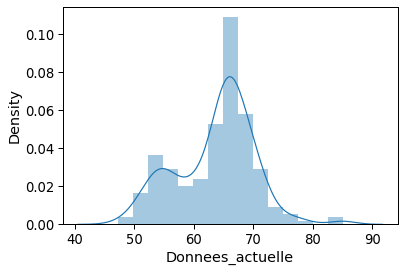

In [26]:
sns.distplot(ind_popul['Donnees_actuelle'])                 #la distribution avant de suppression 
# plt.savefig('population_distplot_avant.png')

In [27]:
ind_popul = ind_popul[ind_popul['Donnees_actuelle']>ind_popul['Donnees_actuelle'].median()]
df_data = df_data[df_data['Country Code'].isin(ind_popul['Country Code'])]
df_data.shape

(929, 6)

<AxesSubplot:xlabel='Donnees_actuelle', ylabel='Density'>

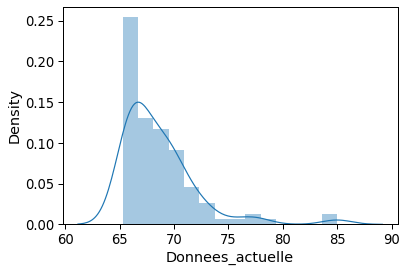

In [28]:
sns.distplot(ind_popul['Donnees_actuelle'])                            #résultat obtenu 
# plt.savefig('population_distplot_apres.png')

Suppression des pays où le nombre de citoyens qui utilisent l'internet  est inférieur à 50% du nombre total

In [29]:
ind_internet=df_data[df_data['Indicator Code'] == "Internet(1/100)"]


<AxesSubplot:xlabel='Donnees_actuelle'>

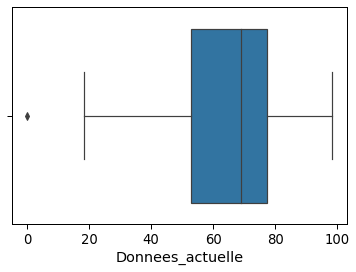

In [30]:
sns.boxplot(ind_internet['Donnees_actuelle'])

<AxesSubplot:xlabel='Donnees_actuelle', ylabel='Density'>

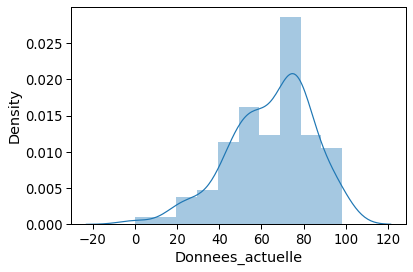

In [31]:
sns.distplot(ind_internet['Donnees_actuelle'])               #la distribution avant de suppression 
# plt.savefig('internet_distplot.png')

In [32]:
ind_internet = ind_internet[ind_internet['Donnees_actuelle']>ind_internet['Donnees_actuelle'].median()]
df_data=df_data[df_data['Country Code'].isin(ind_internet['Country Code'])]
df_data.shape

(446, 6)

<AxesSubplot:xlabel='Donnees_actuelle', ylabel='Density'>

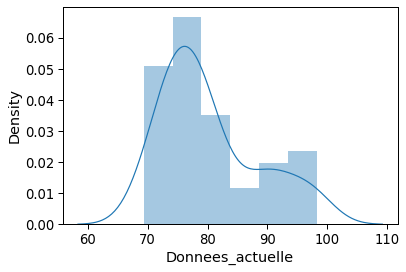

In [33]:
sns.distplot(ind_internet['Donnees_actuelle'])            #le résultat obtenu
# plt.savefig('internet_distplot_apres.png')

In [34]:
df_data.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,Donnees_historique,Donnees_actuelle
count,446,446,446,446,446.000000,446.000000
unique,53,53,11,11,NaN,NaN
top,Qatar,QAT,Internet users (per 100 people),Internet(1/100),NaN,NaN
freq,11,11,53,53,NaN,NaN
mean,NaN,NaN,NaN,NaN,445.622804,659.518534
std,NaN,NaN,NaN,NaN,1729.388898,2501.219188
min,NaN,NaN,NaN,NaN,0.000000,6.434010
25%,NaN,NaN,NaN,NaN,12.028008,14.746283
50%,NaN,NaN,NaN,NaN,53.729101,69.848430
75%,NaN,NaN,NaN,NaN,83.946833,93.483680


In [35]:
df_data_pivot_apres = df_data.pivot_table(index='Country Code', columns='Indicator Code', values='Donnees_actuelle')


<a name='section31'></a>
#### Regardons la corrélation des indicateurs après les étapes que nous avons passées ci-dessus
*  [retour au sommaire](#section0) 


Il ne pointe plus les problèmes mentionnés ci-dessus, mais plutôt un affaiblissement des coefficients de corrélation 
entre les indicateurs


<AxesSubplot:xlabel='Indicator Code', ylabel='Indicator Code'>

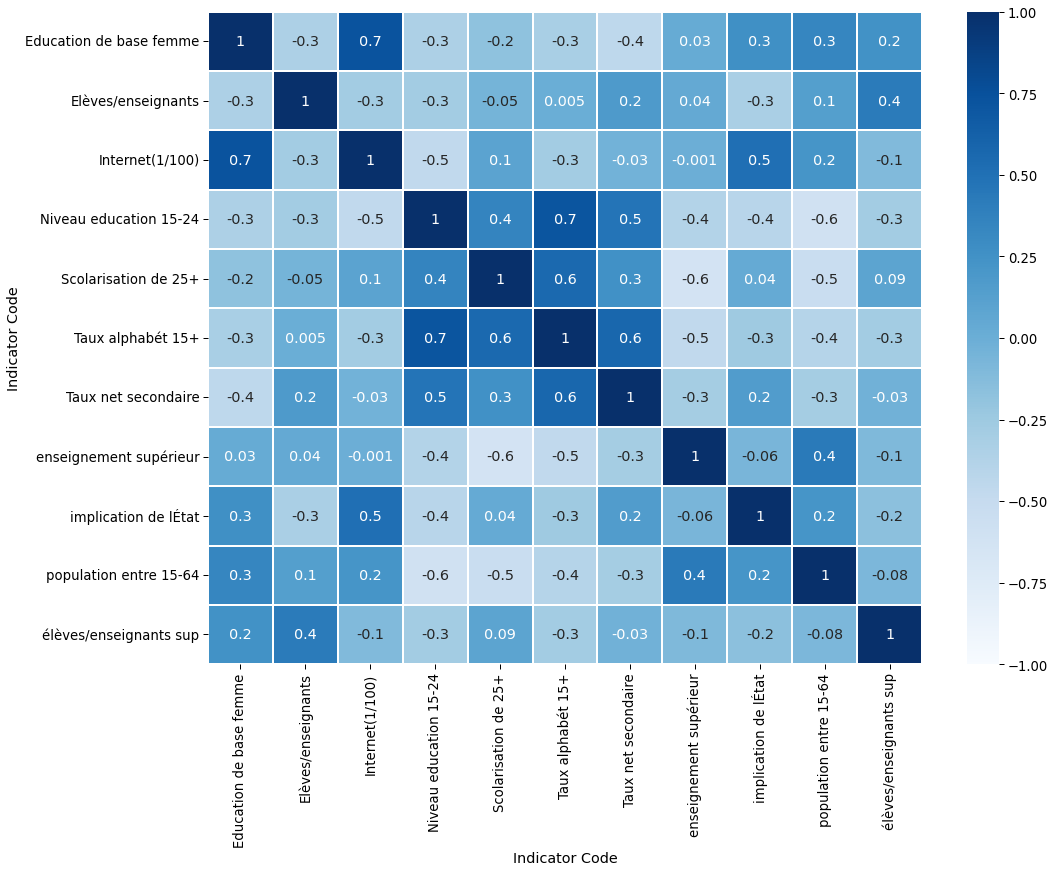

In [36]:
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.5 )
sns.heatmap(df_data_pivot_apres.corr(), annot=True,   vmin=-1,
    vmax=1,cmap='Blues',center=0,fmt='.1g' ,cbar=True,linewidths=0.2,
    linecolor='white')
# plt.savefig('tabl_corr_apres.png')

Vérifions le nombre d'indicateurs 

In [37]:
df_data['Indicator Code'].value_counts()

Internet(1/100)            53
population entre 15-64     53
Elèves/enseignants         50
élèves/enseignants sup     42
Taux net secondaire        40
Scolarisation de 25+       40
enseignement supérieur     36
Taux alphabét 15+          35
Niveau education 15-24     34
implication de lÉtat       32
Education de base femme    31
Name: Indicator Code, dtype: int64

<AxesSubplot:xlabel='Indicator Code', ylabel='count'>

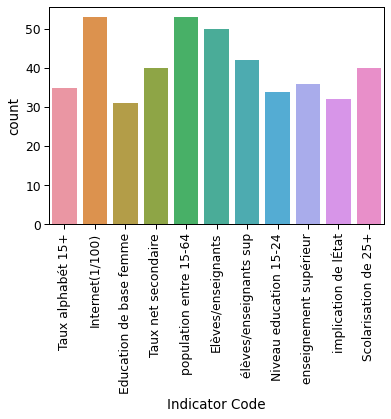

In [38]:
sns.set_context('paper', font_scale=1.4) # représentation graphique 
plt.xticks(rotation=90)
sns.countplot(x='Indicator Code',  data=df_data)
# plt.savefig('numbre_idn.png')

Relation entre les différents identificateurs

<Figure size 1440x1296 with 0 Axes>

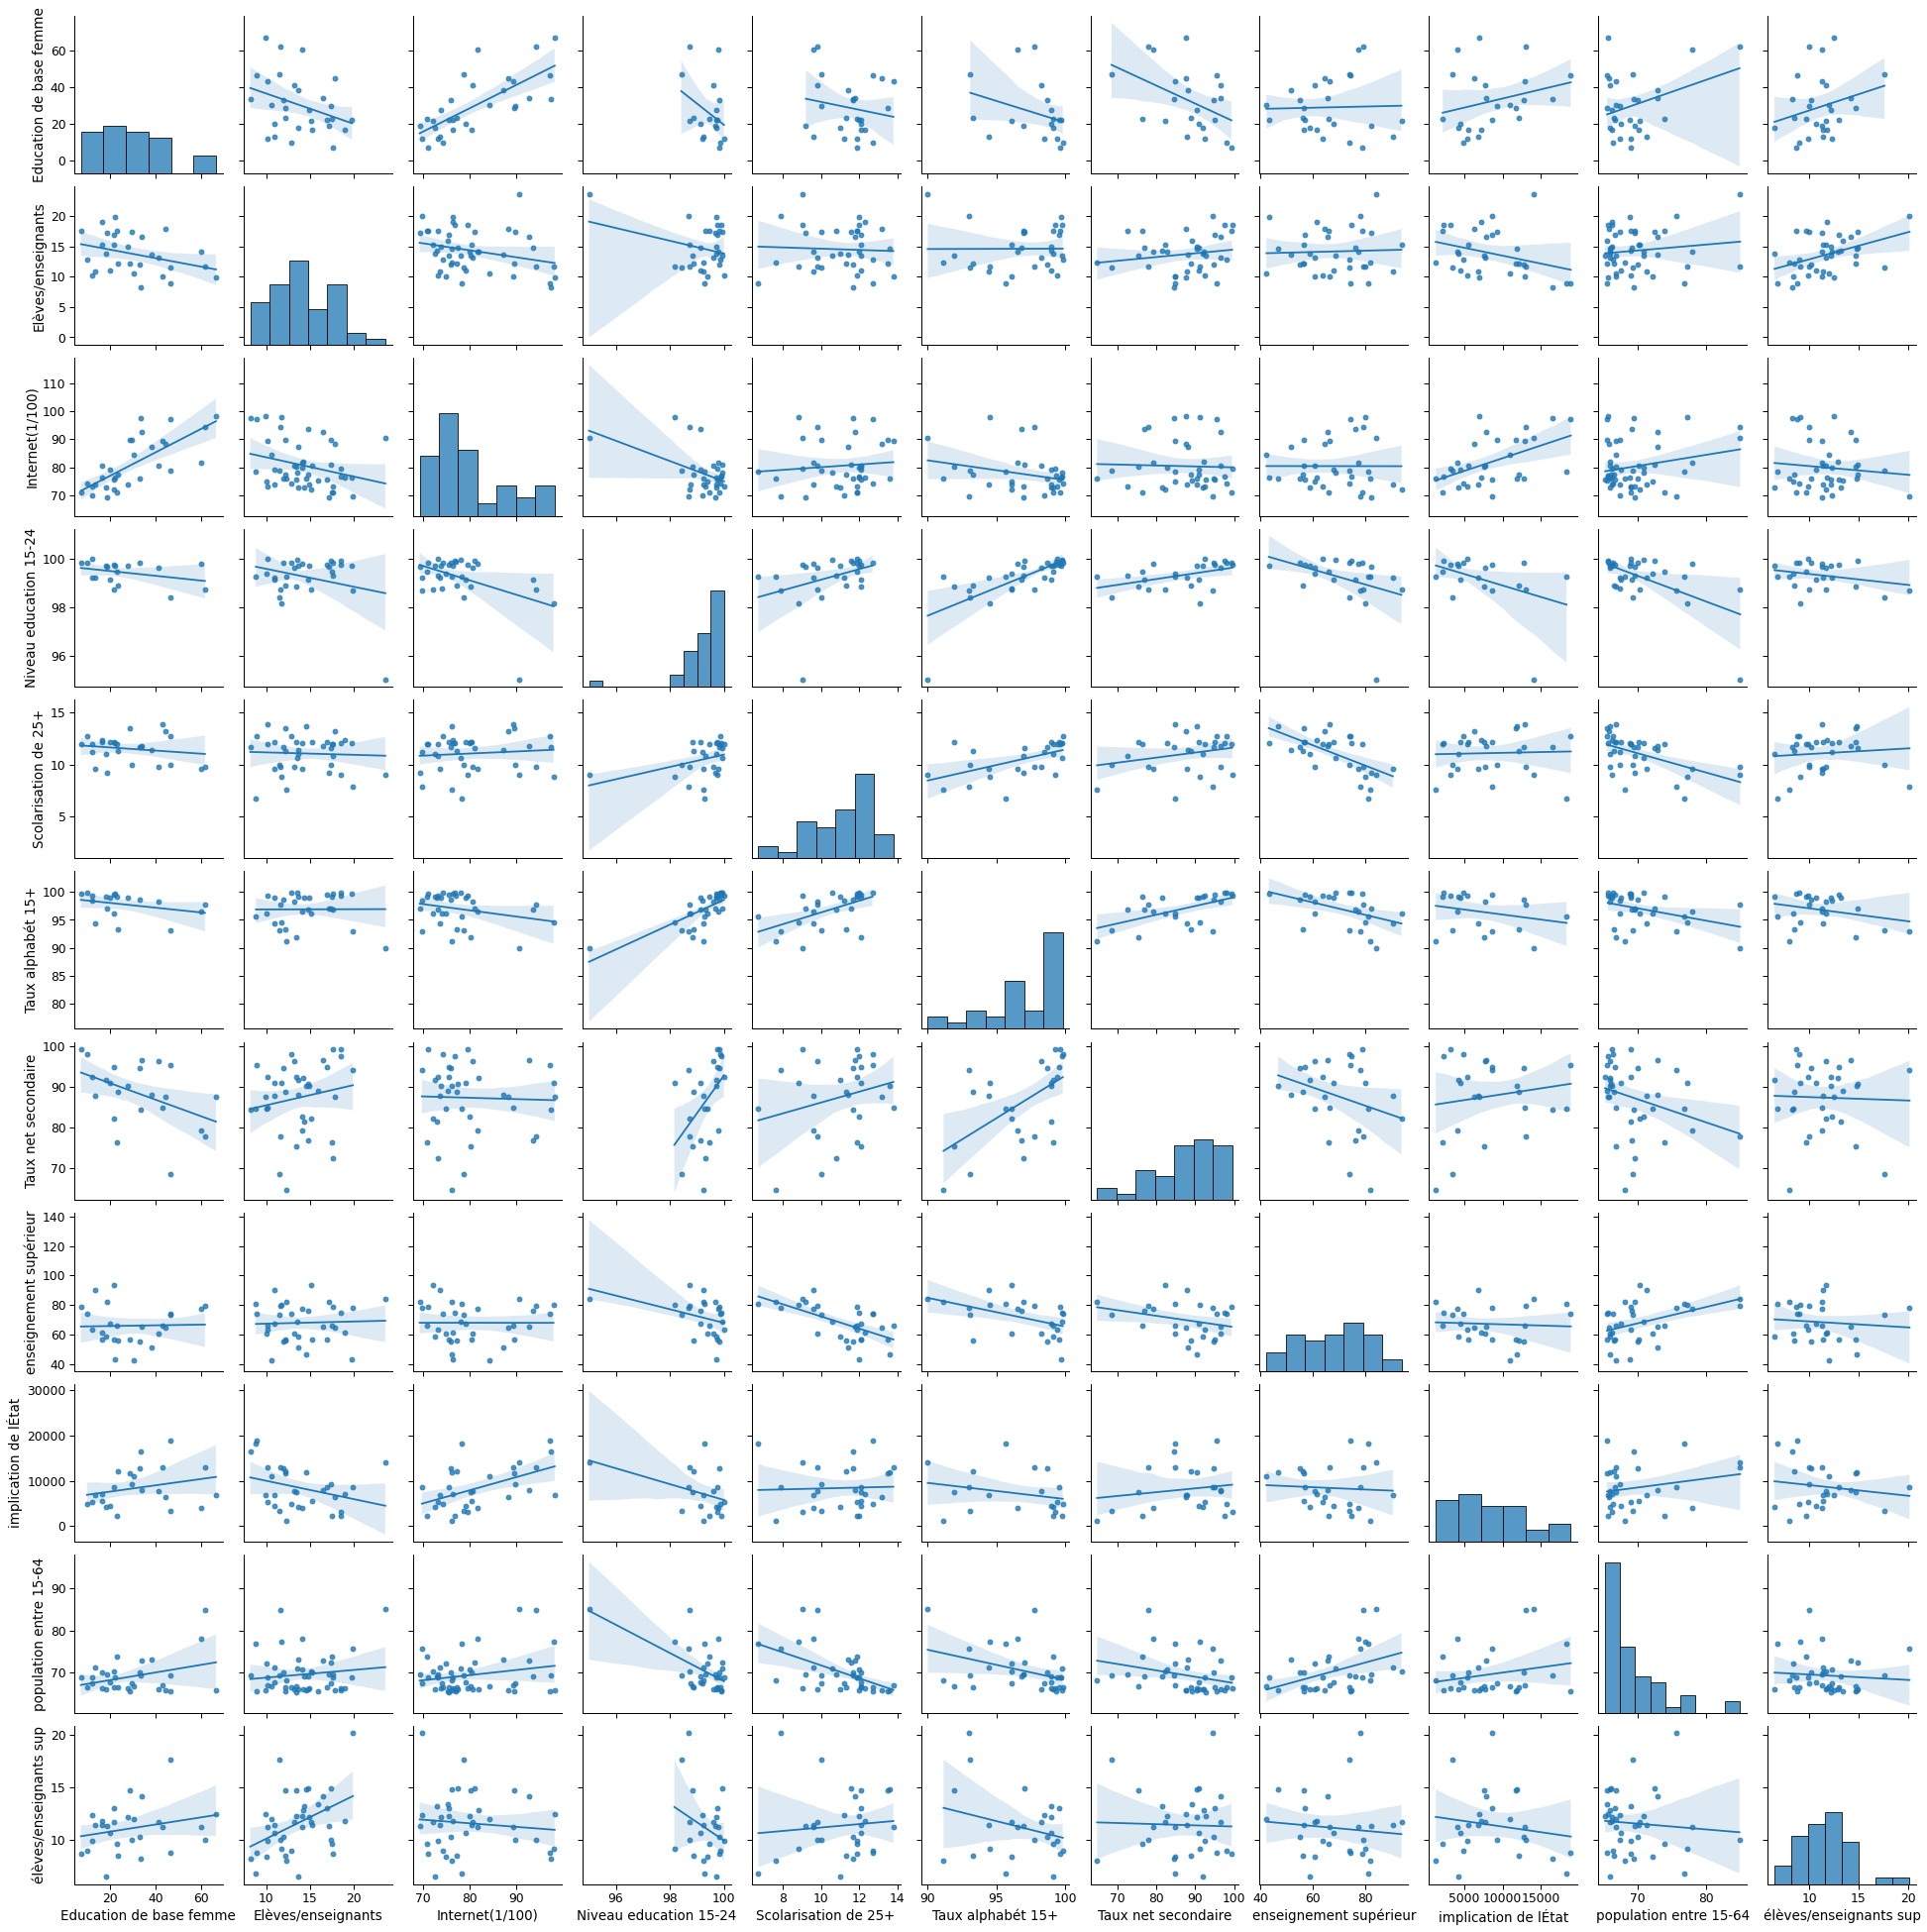

In [39]:
df_data_correl =df_data.pivot_table('Donnees_actuelle', index='Country Code', columns='Indicator Code')
plt.figure(figsize=(20,18))
sns.set_context('paper',font_scale=1.4)
sns.pairplot(df_data_correl, kind='reg')
# plt.savefig('correlation.png' )

Sélectionnons uniquement les pays avec au moins 7 indicateurs

In [40]:
cross_tab=pd.crosstab(df_data['Country Name'],df_data['Indicator Code'])


<AxesSubplot:>

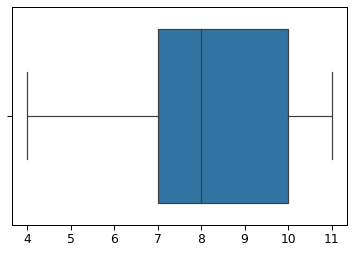

In [41]:
sns.boxplot(cross_tab.sum(axis=1).values)
# plt.savefig('pays_iden.png')

In [42]:
data_pays=pd.crosstab(df_data['Country Name'],df_data['Indicator Code'])[pd.crosstab(df_data['Country Name'],\
                                                                           df_data['Indicator Code']).sum(axis=1)>=7].index

In [43]:
df_data=df_data[df_data['Country Name'].isin(data_pays)]

<AxesSubplot:>

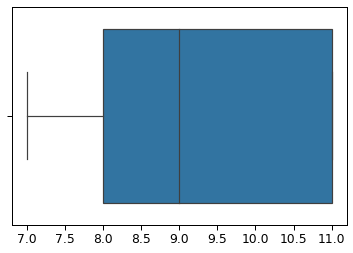

In [44]:
sns.boxplot(pd.crosstab(df_data['Country Name'],df_data['Indicator Code']).sum(axis=1))
# plt.savefig('pays_iden_apres.png')


Voyons quels pays peuvent être sélectionnés par chaque région  et par chaque groupe de développement. Pour ce faire, nous fusionnons d'abord nos 2 Dataframes

In [45]:
df_merge = pd.merge(df_data,df_country)

In [46]:
df_merge.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,Donnees_historique,Donnees_actuelle,Region,Income Group
count,398,398,398,398,398.000000,398.000000,398,398
unique,44,44,11,11,NaN,NaN,5,4
top,Qatar,QAT,Internet users (per 100 people),Internet(1/100),NaN,NaN,Europe & Central Asia,High income: nonOECD
freq,11,11,44,44,NaN,NaN,211,175
mean,NaN,NaN,NaN,NaN,494.212744,731.937542,NaN,NaN
std,NaN,NaN,NaN,NaN,1824.898524,2638.847591,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,6.434010,NaN,NaN
25%,NaN,NaN,NaN,NaN,11.925000,14.725672,NaN,NaN
50%,NaN,NaN,NaN,NaN,54.017379,69.848430,NaN,NaN
75%,NaN,NaN,NaN,NaN,84.794649,94.524178,NaN,NaN



<a name='section4'></a>
malheureusement, il nous reste que 4 niveaux
*  [retour au sommaire](#section0) 

In [47]:
(df_merge.groupby(by='Income Group')[['Donnees_historique','Donnees_actuelle']]).sum()

,Donnees_historique,Donnees_actuelle
Income Group,,
High income: OECD,98986.038705,153172.975077
High income: nonOECD,83282.449047,119295.336445
Lower middle income,2587.159689,2709.576466
Upper middle income,11841.024628,16133.253754


<AxesSubplot:xlabel='Income Group'>

<Figure size 864x576 with 0 Axes>

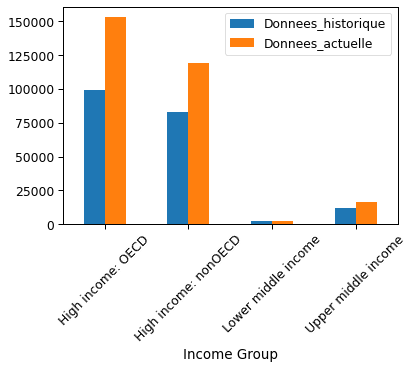

In [48]:
plt.figure(figsize=(12,8))
(df_merge.groupby(by='Income Group')[['Donnees_historique','Donnees_actuelle']]).sum().plot(kind='bar',rot=45)
# plt.savefig('progress_1.png');

In [49]:
df_merge['Income Group'].value_counts()

High income: nonOECD    175
High income: OECD       129
Upper middle income      83
Lower middle income      11
Name: Income Group, dtype: int64

Répartition des pays par leurs niveaux de développement et par la somme des identificateurs

In [50]:
donn_idn = (df_merge.groupby(by=['Income Group','Country Code'])['Donnees_actuelle'].sum())
donn_idn

Income Group          Country Code
High income: OECD     AUS              6702.959208
                      AUT             11201.311446
                      CAN              9527.911505
                      CHE             13282.220971
                      CZE              7394.851494
                      DEU             12021.660084
                      ESP              8338.614129
                      ISL              7238.288741
                      KOR              8303.734366
                      LUX             16782.798344
                      NOR             19311.344945
                      POL              5972.964958
                      SVK              5760.352730
                      SVN              9171.352153
                      USA             12162.610002
High income: nonOECD  ABW               526.271634
                      ARE             14481.434107
                      BHR               568.618110
                      BRB              3685.679

In [51]:
# ces fonctions vont nous aider a choisir 2 pays sur chaque regions et 2 pays sur chaque niveaux 

def choix_pays_niveau(level):
    pays = df_merge[df_merge['Income Group'] == level].groupby(by='Country Name')['Donnees_actuelle'].sum().\
           sort_values(ascending=False).iloc[0:2]
    return pays.index

def choix_pays_region(reg):
    pays = df_merge[df_merge['Region'] == reg].groupby(by='Country Name')['Donnees_actuelle'].sum().\
           sort_values(ascending=False).iloc[0:2]
    return pays.index    

In [52]:
select_pays_niveau=[] # sélection des deux meilleurs pays par leurs niveaux de développement
for niveau in df_merge['Income Group'].unique():
    select_pays_niveau.append(choix_pays_niveau(niveau))  
    
select_pays_region=[] # sélection des deux meilleurs pays par région
for niveau in df_merge['Region'].unique():
    select_pays_region.append(choix_pays_region(niveau))    



<a name='section41'></a>
#### Pays par regions
*  [retour au sommaire](#section0) 

In [53]:
pays_niv_2 = select_pays_region[4].union(select_pays_region[3])              
pays_niv_3 = (select_pays_region[2].union(select_pays_region[1])).union(select_pays_region[0])
pays_region = pays_niv_2.union(pays_niv_3)
pd.DataFrame(pays_region)

,Country Name
0,Australia
1,Barbados
2,Canada
3,"Korea, Rep."
4,Kuwait
5,Luxembourg
6,Norway
7,Puerto Rico
8,United Arab Emirates
9,United States



<a name='section42'></a>
#### Pays par leurs niveaux de développement 
*  [retour au sommaire](#section0) 


In [54]:
pays_niveau=((select_pays_niveau[0].union(select_pays_niveau[1])).union(select_pays_niveau[2])).union(select_pays_niveau[3])
pd.DataFrame(pays_niveau)

,Country Name
0,Hungary
1,Kuwait
2,Luxembourg
3,Malaysia
4,Moldova
5,Norway
6,United Arab Emirates


Regroupons les pays selon ces deux critères

In [55]:
pays_preselectionnes  = pays_niveau.union(pays_region)
pd.DataFrame(pays_preselectionnes)

,Country Name
0,Australia
1,Barbados
2,Canada
3,Hungary
4,"Korea, Rep."
5,Kuwait
6,Luxembourg
7,Malaysia
8,Moldova
9,Norway





<a name='section43'></a>
Les  10 meilleurs  pays selon nos indicateurs
*  [retour au sommaire](#section0) 

In [56]:
select_pays_prioritaire =(df_merge.groupby(by='Country Name')['Donnees_actuelle'].sum().sort_values(ascending = False)).iloc[0:10].index
pd.DataFrame(select_pays_prioritaire)

,Country Name
0,Norway
1,Kuwait
2,Luxembourg
3,United Arab Emirates
4,Qatar
5,Switzerland
6,Cyprus
7,Malta
8,United States
9,Germany


In [57]:
#  INTERSECTION des 3 groupes

pays_principal_niveau_income_intersection = select_pays_prioritaire.intersection(pays_preselectionnes)
intersection_pays = pd.DataFrame(pays_principal_niveau_income_intersection)
intersection_pays

,Country Name
0,Norway
1,Kuwait
2,Luxembourg
3,United Arab Emirates
4,United States


<a name='section71'></a>
####  INTERSECTION 
*  [retour au sommaire](#section0)

Ces 5 pays peuvent être considérés comme les meilleurs, car ils sont tous parmi les pays des régions, parmi les pays avec les meilleurs indicateurs et en même temps ont un niveau de développement très élevé.

<AxesSubplot:xlabel='count', ylabel='Country Name'>

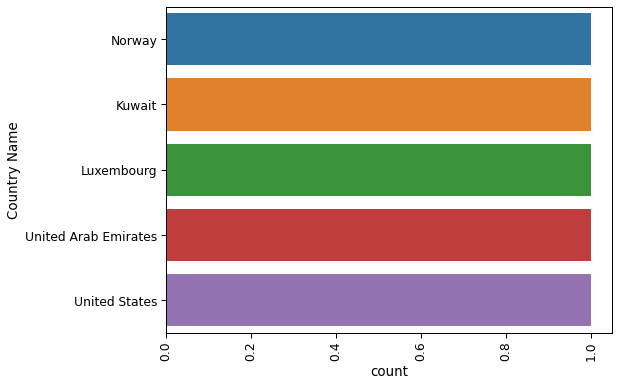

In [58]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(y=intersection_pays['Country Name'])

In [59]:
# DIFFÉRENCE  des 3 groupes 

pays_principal_niveau_income_differance = select_pays_prioritaire.difference(pays_preselectionnes)
pd.DataFrame(pays_principal_niveau_income_differance)

,Country Name
0,Cyprus
1,Germany
2,Malta
3,Qatar
4,Switzerland


In [60]:
df_merge = df_merge[df_merge['Country Name'].isin(select_pays_prioritaire)]

 
<a name='section5'></a>
# Les 10 pays sélectionnés
*  [retour au sommaire](#section0)

    

<AxesSubplot:xlabel='Donnees_actuelle', ylabel='Country Name'>

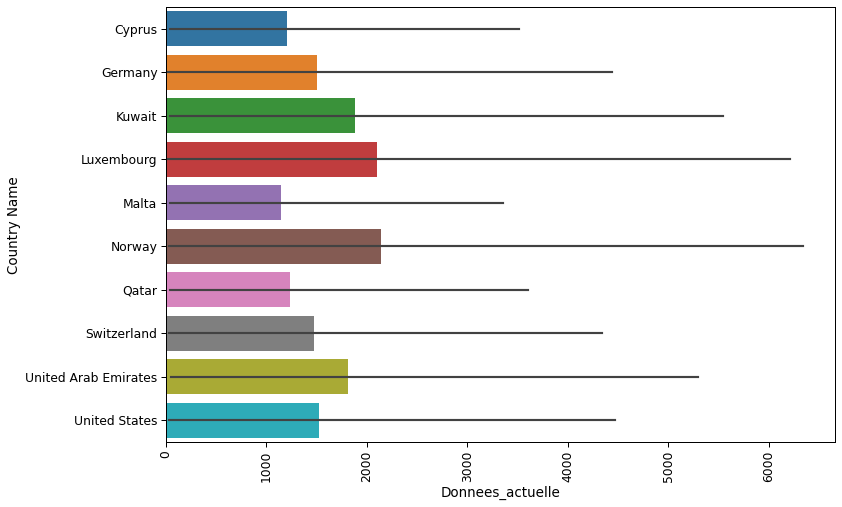

In [61]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x= 'Donnees_actuelle', y='Country Name',data=df_merge, estimator=np.mean)

# 

# Prévisions de développement pour les 10 prochaines années


Pour faire une prévision, nous devons obtenir des coefficients de développement, et pour cela, nous devons créer plusieurs colonnes supplémentaires.

<AxesSubplot:title={'center':'Apres la normalisation '}, xlabel='Donnees_actuelle_norm'>

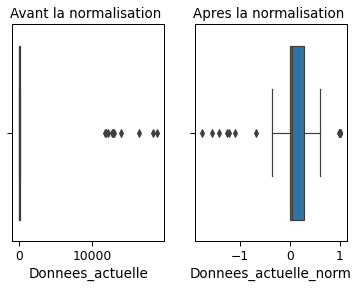

In [62]:
df_merge['develop'] = df_merge['Donnees_actuelle']-df_merge['Donnees_historique'] # creation nouvelle colonne 

df_merge['Donnees_actuelle_norm']=df_merge['develop']/df_merge['Donnees_actuelle'] # normalisation de la colonne 'Donnees_actuelle'

plt.subplot(1,2,1)
plt.title('Avant la normalisation ')
sns.boxplot(df_merge['Donnees_actuelle'])
plt.subplot(1,2,2)
plt.title('Apres la normalisation ')
sns.boxplot(df_merge['Donnees_actuelle_norm'])

In [63]:
df_merge[df_merge['Donnees_historique'] ==0.0]

,Country Name,Country Code,Indicator Name,Indicator Code,Donnees_historique,Donnees_actuelle,Region,Income Group,develop,Donnees_actuelle_norm
93,Cyprus,CYP,Internet users (per 100 people),Internet(1/100),0.0,75.900360,Europe & Central Asia,High income: nonOECD,75.900360,1.0
163,Kuwait,KWT,Internet users (per 100 people),Internet(1/100),0.0,78.367384,Middle East & North Africa,High income: nonOECD,78.367384,1.0
193,Luxembourg,LUX,Internet users (per 100 people),Internet(1/100),0.0,97.493930,Europe & Central Asia,High income: OECD,97.493930,1.0
233,Malta,MLT,Internet users (per 100 people),Internet(1/100),0.0,77.289395,Middle East & North Africa,High income: nonOECD,77.289395,1.0
301,Qatar,QAT,Internet users (per 100 people),Internet(1/100),0.0,94.291118,Middle East & North Africa,High income: nonOECD,94.291118,1.0
384,United Arab Emirates,ARE,Internet users (per 100 people),Internet(1/100),0.0,90.600007,Middle East & North Africa,High income: nonOECD,90.600007,1.0


In [64]:
df_merge['Donnees_historique'].replace(to_replace=0.0, value=100.0, inplace=True)       #pour eviter divisé par 0

In [65]:
df_merge['coeff %'] = (df_merge['develop']/df_merge['Donnees_historique'])*100          #creation les coefficients 

In [66]:
df_merge[['Country Name','Indicator Name','coeff %']]

,Country Name,Indicator Name,coeff %
91,Cyprus,"Adult literacy rate, population 15+ years, bot...",4.573807
92,Cyprus,Government expenditure per upper secondary stu...,104.563321
93,Cyprus,Internet users (per 100 people),75.900360
94,Cyprus,"Labor force with basic education, female (% of...",11.537155
95,Cyprus,"Net enrolment rate, secondary, both sexes (%)",7.766605
...,...,...,...
393,United States,Percentage of female students in tertiary educ...,-0.492236
394,United States,"Population, ages 15-64 (% of total)",6.661631
395,United States,Pupil-teacher ratio in primary education (head...,3.682208
396,United States,Pupil-teacher ratio in upper secondary educati...,-1.756787


In [67]:
# on divise par 5 à la fin car il s'agit d'une prévision sur 10 ans, pas sur 50

df_merge['prevision 10 ans'] =(df_merge['Donnees_actuelle']*(1 + df_merge['coeff %'])/100)/5  

<a name='section7'></a>
#### Évaluation de ce potentiel
*  [retour au sommaire](#section0) 

<Figure size 1440x1152 with 0 Axes>

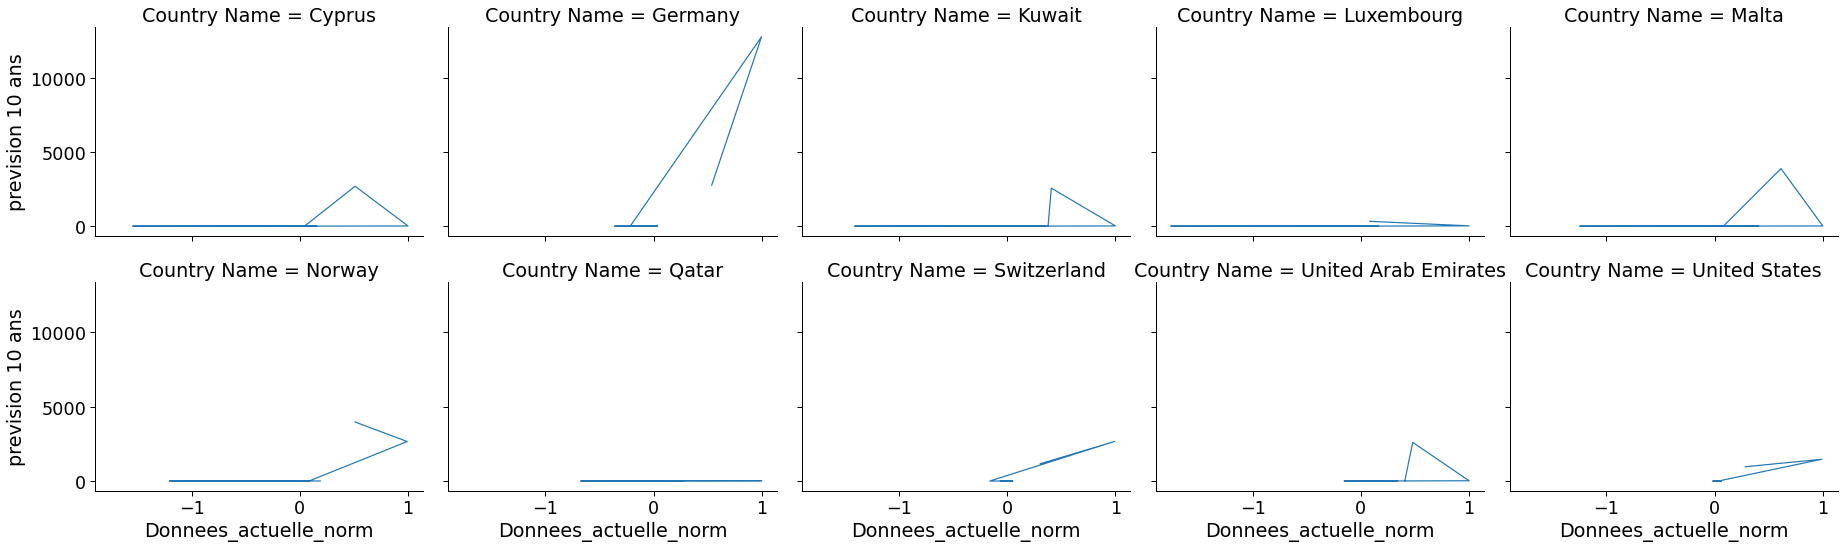

In [68]:
plt.figure(figsize=(20,16))
sns.set_context('paper', font_scale=2.0)
facet_grid = sns.FacetGrid(df_merge, col='Country Name',col_wrap=5,height=4, aspect=1.3,palette='Set1')
facet_grid.map(plt.plot, 'Donnees_actuelle_norm', 'prevision 10 ans')
# plt.savefig('pays_select.png')

# 

# Et finalement les pays avec le fort potentiel d'évaluation


In [69]:
df_merge['Indicator Name'].value_counts() 

Government expenditure per upper secondary student (PPP$)                  10
Internet users (per 100 people)                                            10
Population, ages 15-64 (% of total)                                        10
Pupil-teacher ratio in primary education (headcount basis)                 10
UIS: Mean years of schooling of the population age 25+. Total              10
Percentage of female students in tertiary education enrolled in ISCED 6     9
Pupil-teacher ratio in upper secondary education (headcount basis)          9
Net enrolment rate, secondary, both sexes (%)                               8
Labor force with basic education, female (% of female labor force)          7
Adult literacy rate, population 15+ years, both sexes (%)                   5
Youth literacy rate, population 15-24 years, both sexes (%)                 5
Name: Indicator Name, dtype: int64

In [70]:
max_coeff =[]  # valeur maximale pour chaque identificateur

for i in df_merge['Indicator Name'].unique():
    max_coeff.append((df_merge[df_merge['Indicator Name'] == i])['prevision 10 ans'].max())

In [71]:
max_coeff

[12.468026844665395,
 3974.032898911435,
 12749.682925437874,
 0.9635203742446498,
 2.021080068635496,
 0.3389027363693438,
 6.611935167700786,
 0.13613509386808992,
 0.3662766002677402,
 1.5742417910447764,
 9.821768195668927]

#### en conséquence, nous avons perdu 3 pays, car ils ne contenaient pas les valeurs maximales

In [72]:
df_merge = df_merge[df_merge['prevision 10 ans'].isin(max_coeff)] 
df_merge['Country Name'].unique()

array(['Germany', 'Kuwait', 'Malta', 'Norway', 'Qatar',
       'United Arab Emirates', 'United States'], dtype=object)

In [73]:

pays_potentiel_eval = df_merge.pivot_table(index='Indicator Code',columns='Country Name', values='prevision 10 ans')

In [74]:
pays_potentiel_eval = pays_potentiel_eval.fillna(0.0) # remplissage des valeurs manquents

<a name='section8'></a>
#### pays avec le fort potentiel d'évaluation
*  [retour au sommaire](#section0)

<AxesSubplot:xlabel='Country Name', ylabel='Indicator Code'>

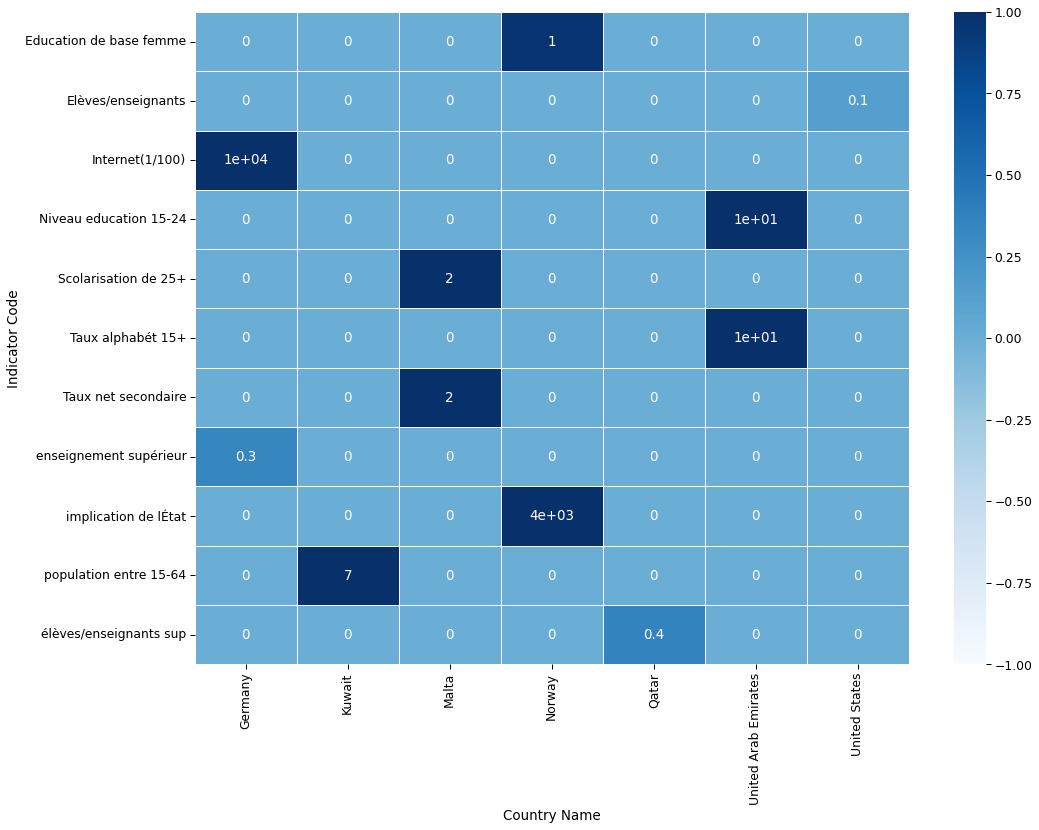

In [75]:
plt.figure(figsize=(16,12))
sns.set_context('paper',font_scale=1.4 )
sns.heatmap(pays_potentiel_eval, annot=True,   vmin=-1,
    vmax=1,cmap='Blues',center=0,
    fmt='.1g',linecolor='white', linewidths=0.5 )
# plt.savefig('potentiel_eval.png')

<a name='section81'></a>
# Quelques observations
*  [retour au sommaire](#section0) 

Quelques observations  :

1. proposer des cours pour les jeunes de 15 à 24 ans aux Emirats Arabes Unis
2. organiser on-line cours en Norvège, en particulier pour les femmes, afin d'améliorer leurs compétences professionnelles et de les mettre en œuvre dans le cadre des propositions et stratégies gouvernementales.
3. il y a peu d'enseignants qualifiés dans presque tous les pays. 
4. ...